In [85]:
import networkx as nx
import matplotlib.pyplot as plt

Tworzenie grafu

Graf = zbiór wierzchołków i krawędzi (aka linków) pomiędzy parami wierzchołków.
W NetworkX wierchołkiem może być dowolny hashable obiekt, np. tekst, obrazek, obiekt XML, inny graf i wiele innych.

In [86]:
G = nx.Graph() # domyślnie graf nieskierowany
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_edge(1, 2)
G.add_edge(3,5)
G.add_edge(6,0)
G.add_edges_from([(1, 2), (1, 3)])
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1]))  # albo list(G.neighbors(1))
print(G.degree[1])  # liczba wierzchołków o stopniu 1

[1, 2, 3, 5, 6, 0]
[(1, 2), (1, 3), (3, 5), (6, 0)]
[2, 3]
2


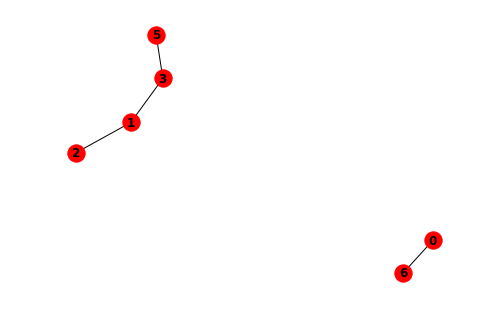

In [87]:
# Rysowanie grafu
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [88]:
# Layouts i opcje rysowania

# Layout w NetwokrkX oznacza sposób rozplanowania węzłów w wizualizacji grafu.
# Lista dostępnych layoutów: 
#    https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

# Przykłady:
# bipartite_layout - węzły w dwóch liniach prostych
# circular_layout - węzły na okręgu
# random_layout - węzły rozmieszczone randomowo     

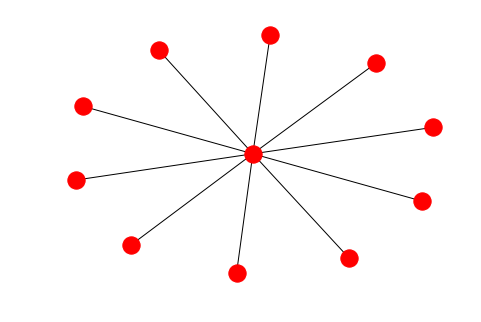

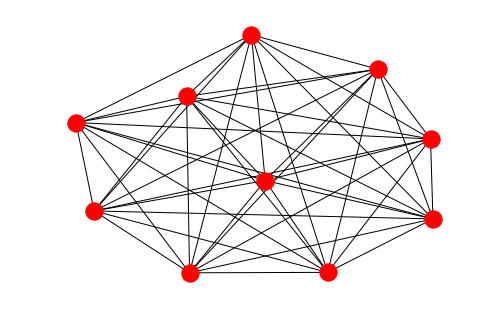

In [89]:
# Generatory grafow - funkcje generujące ustrukturyzowane lub randomowe grafy
# https://networkx.github.io/documentation/latest/reference/generators.html
# Przykłady:
# star_graph
# binomial_graph

G2 = nx.networkx.generators.star_graph(10)
G3 = nx.networkx.generators.binomial_graph(10, 5)
nx.draw(G2)
plt.show()
nx.draw(G3)
plt.show()

In [92]:
# Zadanie 1
# Stwórz pełny graf o 10 wierzchołkach na dwa różne sposoby i wyświetl je obok siebie, korzystając
# z różnych circular layout i random layout

# Pomocne linki:
# https://networkx.github.io/documentation/latest/reference/generators.html
# https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

# full_graph = ...
# full_graph_2 = ...

class Exercise1():
    
    def __init__(self):
        self.full_graph_1 = None
        self.full_graph_2 = None
        self.create_full_graph_one_way()
        self.create_full_graph_another_way()
    
    def create_full_graph_one_way(self):
        #self.full_graph_1 = ...
        raise Exception("Not implemented")
        
    def create_full_graph_another_way(self):
         #self.full_graph_2 = ...
        raise Exception("Not implemented")
        
    def plot_both_graphs(self):
        nx.draw(self.full_graph_1, pos=nx.circular_layout(self.full_graph_1))
        plt.show()
        nx.draw(self.full_graph_2, pos=nx.random_layout(self.full_graph_2))
        plt.show()
        
    def validate(self):
        result = nx.is_isomorphic(self.full_graph_1, self.full_graph_2)
        if not result:
            raise Exception("Graphs are not equal")

exercise1 = Exercise1()
exercise1.plot_both_graphs()
exercise1.validate()

Exception: Not implemented

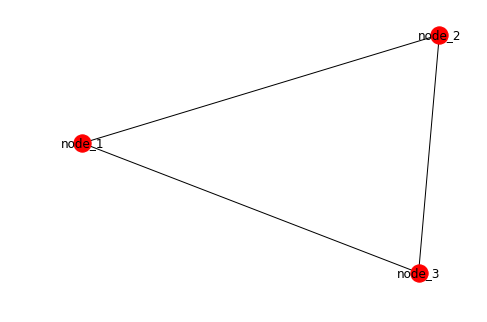

In [93]:
# Wczytywanie grafu z pliku

graph_from_file = nx.Graph()
edges = nx.read_edgelist('edges.txt')
nodes = nx.read_adjlist("nodes.txt")
graph_from_file.add_edges_from(edges.edges())
graph_from_file.add_nodes_from(nodes)
nx.draw(graph_from_file, with_labels=True)

In [94]:
# Community w grafie - zbiór węzłów, które są ze sobą gęsto połączone w obrębie community,
# będąc jednocześnie słabiej połączonymi z innymi węzłami.
# Dwa węzły mają większą szansę być ze sobą połączone jeśli są w obrębie jednego community.
# https://networkx.github.io/documentation/stable/reference/algorithms/community.html

# Istnieje wiele algorytmów do wykrywania communities w grafach.

# Algorytm Girvan–Newmana - oparty o betweenness i usuwanie węzłów o najwyższym betweenness -
# węzły łączące communities mają najwyższe betweenness, więc podczas ich usuwania 
# wyodrębniają się istniejące communnities.

# Wybor algorytmow community
# co to jest community itd


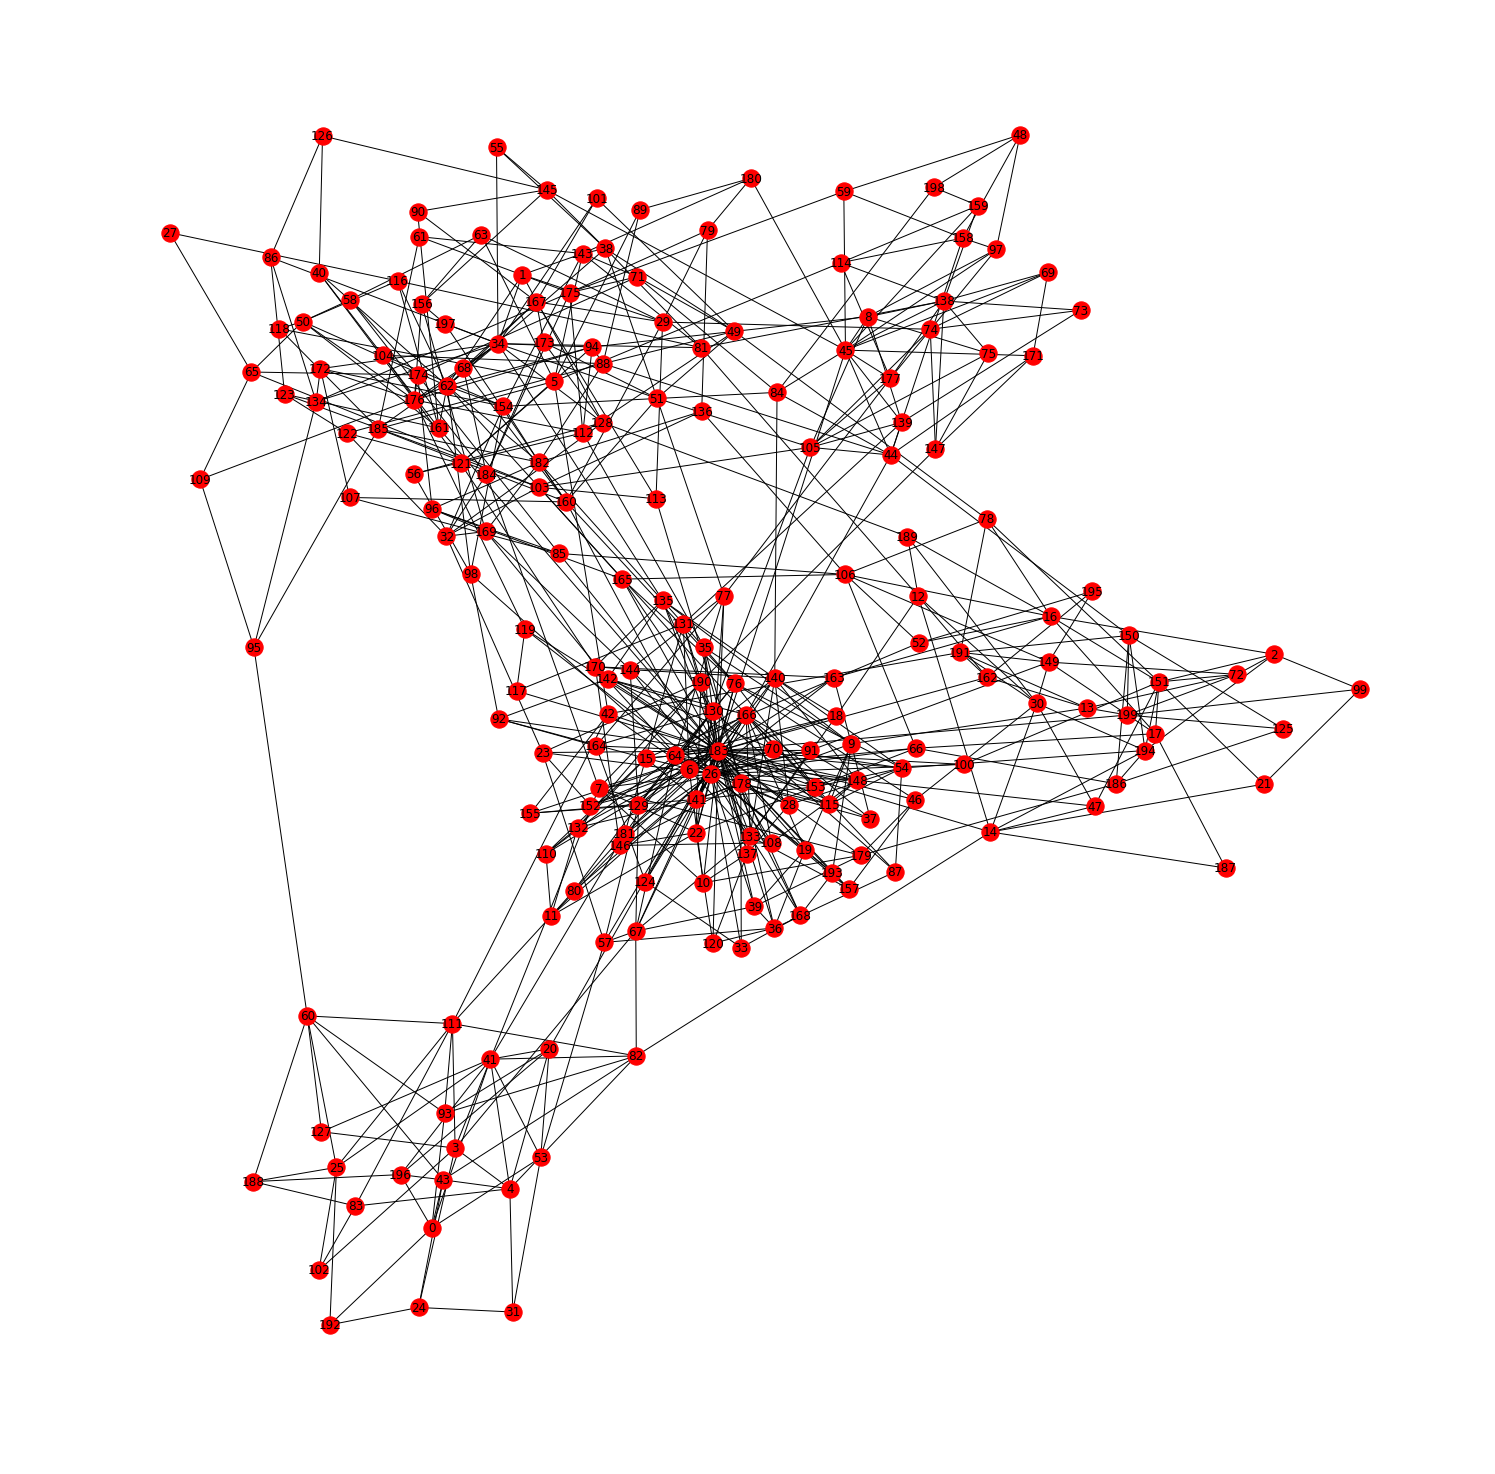

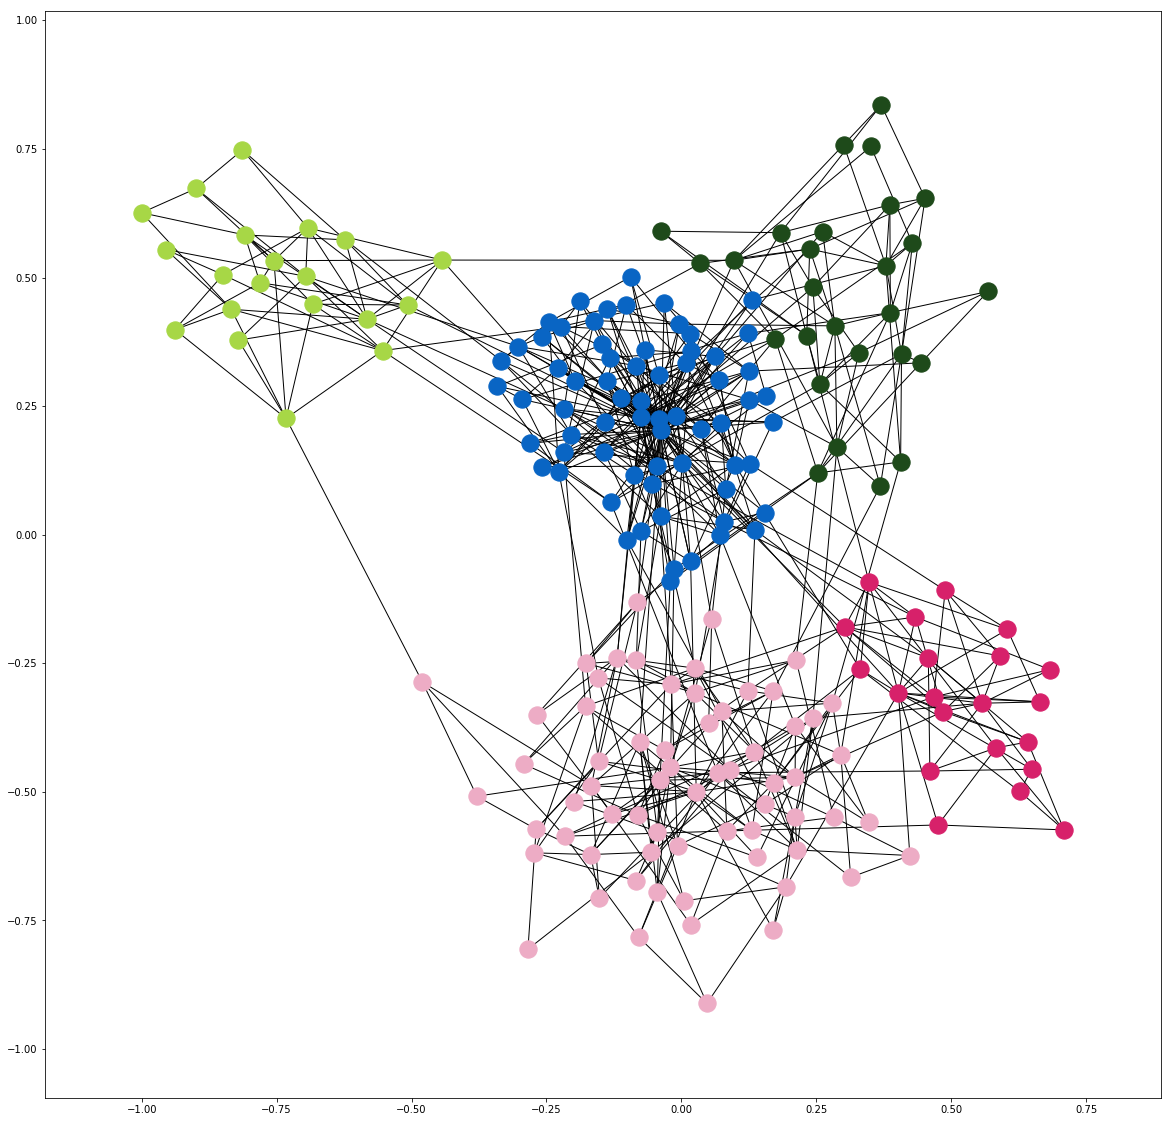

In [95]:
# Generowanie grafu, który ma community:
# Używamy algorytmu o nazwie Lancichinetti–Fortunato–Radicchi benchmark, który pozwala na generowanie sieci
# z communities znanymi a priori. Algorytmu używa się do tego, aby generować grafy na których później testuje się 
# inne metody wykrywania communieties (przez porównanie wyników ze zbiorem faktycznych communities).

from networkx.algorithms.community import LFR_benchmark_graph
from matplotlib.pyplot import figure
import numpy

G = LFR_benchmark_graph(n=200, tau1=3, tau2=1.5, mu=0.1, min_community=20, min_degree=3,
                        seed=42)
communities = {frozenset(G.nodes[v]['community']) for v in G}
figure(figsize=(20,20))
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)

figure(figsize=(20,20))
pos = nx.spring_layout(G)
for community in list(communities):
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=1)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges)

plt.show()

In [96]:
print("Utworzono communities: ", len(communities), "\n")
communities_counter = 0
for community in communities:
    communities_counter += 1
    print("Community ", communities_counter)
    print(list(community))
    print("Liczność community: ", len(community), "\n")

Utworzono communities:  5 

Community  1
[2, 194, 195, 66, 199, 72, 12, 13, 14, 78, 16, 17, 149, 150, 151, 21, 30, 162, 99, 106, 47, 52, 125, 186, 187, 189, 191]
Liczność community:  27 

Community  2
[6, 7, 9, 10, 11, 15, 18, 19, 22, 23, 26, 28, 33, 35, 36, 37, 39, 42, 46, 54, 57, 64, 67, 70, 76, 77, 80, 87, 91, 92, 100, 108, 110, 115, 117, 119, 120, 124, 129, 130, 131, 132, 133, 135, 137, 140, 141, 142, 144, 146, 148, 152, 153, 155, 157, 163, 164, 165, 166, 168, 170, 178, 179, 181, 183, 190, 193]
Liczność community:  67 

Community  3
[0, 192, 3, 4, 196, 82, 83, 20, 24, 25, 93, 31, 102, 41, 43, 60, 111, 53, 188, 127]
Liczność community:  20 

Community  4
[1, 5, 27, 29, 32, 34, 38, 40, 49, 50, 51, 55, 56, 58, 61, 62, 63, 65, 68, 71, 79, 81, 85, 86, 88, 89, 90, 94, 95, 96, 98, 101, 103, 104, 107, 109, 112, 113, 116, 118, 121, 122, 123, 126, 128, 134, 136, 143, 145, 154, 156, 160, 161, 167, 169, 172, 173, 174, 175, 176, 180, 182, 184, 185, 197]
Liczność community:  65 

Community  5
[6

In [97]:
from networkx.algorithms.community.centrality import girvan_newman
communities_iter = girvan_newman(G)

communities_sum = 0

for community_gn in next(communities_iter):
    communities_sum += 1
    print("Community ", communities_sum)
    print(community_gn)
    print("Liczność community: ", len(community_gn), "\n")
    
print("Znaleziono communities: ", communities_sum)

Community  1
{0, 192, 3, 196, 4, 102, 41, 43, 127, 111, 82, 188, 20, 53, 83, 24, 25, 60, 93, 31}
Liczność community:  20 

Community  2
{1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 193, 194, 195, 197, 198, 199}
Liczność community:  180 

Znaleziono communities:  2


In [98]:
figure(figsize=(15,15))
pos = nx.spring_layout(G)
for community in list(communities_gn):
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=1)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges)

plt.show()

NameError: name 'communities_gn' is not defined

<Figure size 1080x1080 with 0 Axes>

In [ ]:
Pomysł na duże zadanie. Po wybraniu zbioru danych przetestować różne algorytmy 
do wykrywania communities i załączyć wyniki (wizualizacje). Jak bardzo wyniki się od siebie różnią?
Dlaczego tak jest?

In [125]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

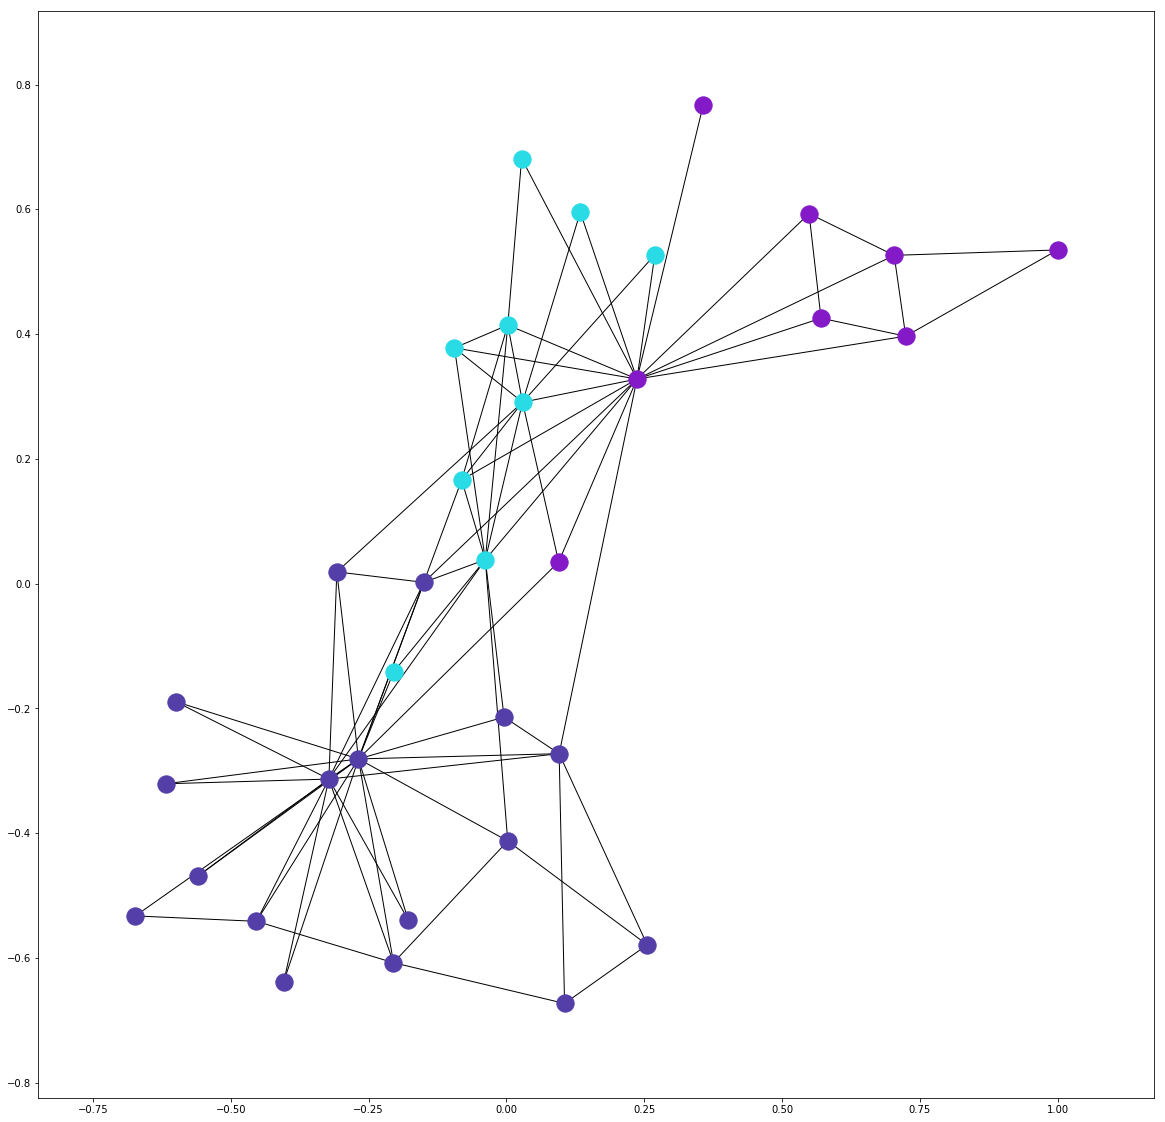

In [128]:
communities = greedy_modularity_communities(G)
figure(figsize=(20,20))
pos = nx.spring_layout(G)
for community in list(communities):
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=1,
                           state=42)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges)

plt.show()